In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST 데이터 불러오기

fashion mnins 데이터를 불러와 train과 test 셋으로 받아준다.

train input을 0~255에서 0~1사이의 값으로 바꾸고, 채널 차원을 추가해준다.

train set을 train과 validation set으로 나눠준다.

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

Sequential 클래스를 활용하여 모델을 만든다.

In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [5]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## 모델 컴파일과 훈련

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20


1500/1500 [==============================] - 24s 14ms/step - loss: 0.5073 - accuracy: 0.8184 - val_loss: 0.3150 - val_accuracy: 0.8831
Epoch 2/20
   5/1500 [..............................] - ETA: 20s - loss: 0.3266 - accuracy: 0.8875

c:\Users\kjsid\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 21s 14ms/step - loss: 0.3348 - accuracy: 0.8797 - val_loss: 0.2719 - val_accuracy: 0.8966
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2893 - accuracy: 0.8953 - val_loss: 0.2460 - val_accuracy: 0.9084
Epoch 4/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2552 - accuracy: 0.9070 - val_loss: 0.2344 - val_accuracy: 0.9113
Epoch 5/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2340 - accuracy: 0.9137 - val_loss: 0.2296 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2137 - accuracy: 0.9213 - val_loss: 0.2139 - val_accuracy: 0.9218
Epoch 7/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1947 - accuracy: 0.9266 - val_loss: 0.2163 - val_accuracy: 0.9209
Epoch 8/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.1792 - accuracy: 0.9330 - val_loss: 0.2294 - val_accura

In [8]:
import matplotlib.pyplot as plt

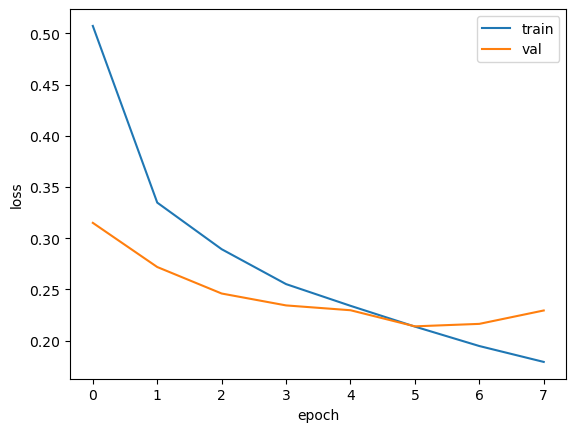

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2139 - accuracy: 0.9218


[0.21391214430332184, 0.921750009059906]

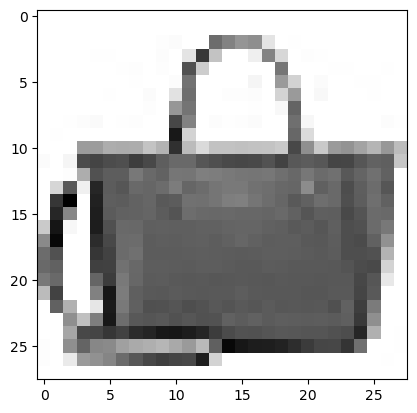

In [11]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [12]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 129ms/step
[[5.1845145e-14 8.6782131e-24 1.6993232e-18 4.6930247e-16 2.2524703e-14
  7.5286775e-14 5.5437432e-14 4.2666807e-15 1.0000000e+00 1.2522437e-16]]


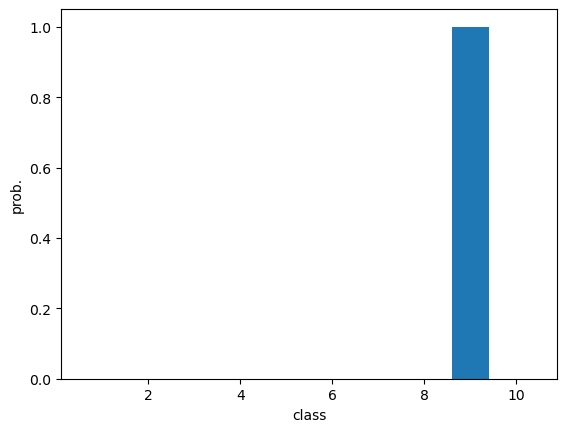

In [13]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [14]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [15]:
import numpy as np
# 최댓값의 인덱스를 구해 출력
print(classes[np.argmax(preds)])

가방


In [16]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [17]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2386 - accuracy: 0.9147


[0.2385566383600235, 0.9146999716758728]